In [94]:
#Importação de bibliotecas que serão usadas
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df_aracaju = pd.read_excel('/content/drive/MyDrive/projeto_pandas/datasets/Aracaju.xlsx')
df_fortaleza = pd.read_excel('/content/drive/MyDrive/projeto_pandas/datasets/Fortaleza.xlsx')
df_natal = pd.read_excel('/content/drive/MyDrive/projeto_pandas/datasets/Natal.xlsx')
df_recife = pd.read_excel('/content/drive/MyDrive/projeto_pandas/datasets/Recife.xlsx')
df_salvador = pd.read_excel('/content/drive/MyDrive/projeto_pandas/datasets/Salvador.xlsx')

In [ ]:
#Concatenar arquivos
df = pd.concat([df_aracaju,df_fortaleza,df_natal,df_recife,df_salvador])

#Para trazer uma amostra do conjunto de dados usar o método .sample()
df.sample(10)

,Cidade,Data,Vendas,LojaID,Qtde
127,Recife,2019-03-02,39.56,982,8
72,Natal,2018-05-02,612.00,854,4
29,Recife,2019-01-01,10.18,980,8
6,Recife,2019-01-01,16.27,981,6
170,Natal,2019-01-02,9.26,1035,3
75,Salvador,2019-01-01,155.52,1034,1
168,Natal,2019-01-02,20.22,1036,1
115,Natal,2019-01-02,202.33,1035,2
47,Fortaleza,2019-01-01,13.45,1004,5
222,Salvador,2019-01-02,43.96,1037,1


In [9]:
df["Cidade"].unique()

array(['Aracaju', 'Fortaleza', 'Natal', 'Recife', 'Salvador'],
      dtype=object)

In [10]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [12]:
df["LojaID"] = df['LojaID'].astype('object')
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [14]:
#Consultar quantidade de linhas nulas no dataframe
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [15]:
#Substituindo valores nulos pela média
df["Vendas"].fillna(df['Vendas'].mean(), inplace=True)

In [16]:
#Substituindo valores nulos por zero
df["Vendas"].fillna(0, inplace=True)

In [18]:
#Apagar linhas com valores nulos - nesse caso toda linha que possuir um valor nulo será apagada
df.dropna(inplace=True)

In [19]:
#Apagar linhas com valores nulos com base em uma coluna específica - nesse caso irá apagar as linhas que possuem valores nulos na coluna Vendas
df.dropna(subset=["Vendas"],inplace=True)

In [20]:
#Remover linhas com valores faltantes em todas as colunas
df.dropna(how='all', inplace=True)

In [23]:
#Criar colunas
df["Receita"] = df["Vendas"].mul(df["Qtde"]) #caso fosse necessário dividir faria, por exemplo, df["Receita"]/df["Vendas"]

df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita
193,Natal,2019-01-02,3.97,1036,2,7.94
17,Fortaleza,2019-01-01,166.80,1004,1,166.80
220,Salvador,2019-01-02,42.71,1035,1,42.71
235,Natal,2019-01-03,41.84,1034,1,41.84
98,Natal,2019-01-02,231.76,1036,3,695.28


In [26]:
#Informar maior e menor receita, respectivamente
print(f'''
Maior receita: R$ {df['Receita'].max()}
Menor receita: R$ {df['Receita'].min()}
''')


Maior receita: R$ 3544.0
Menor receita: R$ 3.34



In [27]:
#Nesse caso informar os MELHORES top 3 com base na coluna Receita
df.nlargest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
51,Natal,2018-01-21,859.0,852,4,3436.0
55,Natal,2019-01-08,859.0,854,4,3436.0


In [28]:
#Nesse caso informar os PIORES top 3 com base na coluna Receita
df.nsmallest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
118,Aracaju,2018-01-01,3.34,1522,1,3.34
65,Recife,2019-01-01,4.01,981,1,4.01
92,Natal,2019-01-02,4.57,1035,1,4.57


In [34]:
#Mostrar o total de receita por cidade de forma ordenada (decrescente)
  #Usamos o métodos groupby para agrupar os valores, sum para somar e sort_values para ordenar
df.groupby("Cidade")["Receita"].sum().sort_values(ascending=False)

Cidade
Natal        167227.52
Recife        51936.51
Aracaju       48748.25
Salvador      40596.73
Fortaleza     37913.97
Name: Receita, dtype: float64

#Trabalhando com datas


In [35]:
#Para transformar uma coluna que não está no formato de data usamos o seguinte método
df["Data"] = pd.to_datetime(df["Data"])

In [36]:
#Retornar a receita por ano
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [55]:
#Criar uma coluna para ano, mês e dia da venda
df["Ano_Venda"],df["Mês_Venda"],df["Dia_Venda"] = df["Data"].dt.year, df["Data"].dt.month, df["Data"].dt.day

df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_venda,Mês_venda,Dia_venda,Diferença Dias,Diferença_Dias,Ano_Venda,Mês_Venda,Dia_Venda
45,Aracaju,2018-01-01,131.12,1523,5,655.60,2018,1,1,0 days,0 days,2018,1,1
157,Natal,2019-01-02,150.17,1036,2,300.34,2019,1,2,366 days,366 days,2019,1,2
107,Natal,2019-01-02,14.70,1035,1,14.70,2019,1,2,366 days,366 days,2019,1,2
55,Aracaju,2018-01-01,67.23,1520,8,537.84,2018,1,1,0 days,0 days,2018,1,1
106,Aracaju,2018-01-01,16.32,1520,7,114.24,2018,1,1,0 days,0 days,2018,1,1


In [65]:
#Apagar colunas
df.drop(columns=["Ano_venda","Mês_venda","Dia_venda"], inplace=True)

In [63]:
#Dia mais antigo e mais recente do dataset
print(
f'''
  Dia mais antigo: {df['Data'].min()}
  Dia mais recente: {df["Data"].max()}'''
)


  Dia mais antigo: 2018-01-01 00:00:00
  Dia mais recente: 2019-04-05 00:00:00


In [66]:
#Calculando a diferença de dias entre a data da venda mais antiga e a data da venda

df['Diferença_Dias'] = df['Data'] - df['Data'].min()

df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Diferença Dias,Diferença_Dias,Ano_Venda,Mês_Venda,Dia_Venda,Trimestre_Venda
59,Recife,2019-01-01,89.39,983,5,446.95,365 days,365 days,2019,1,1,1
104,Salvador,2019-01-01,188.79,1036,3,566.37,365 days,365 days,2019,1,1,1
124,Recife,2019-03-02,47.98,983,7,335.86,425 days,425 days,2019,3,2,1
56,Salvador,2019-01-01,178.44,1035,3,535.32,365 days,365 days,2019,1,1,1
42,Salvador,2019-01-01,44.28,1034,1,44.28,365 days,365 days,2019,1,1,1


In [73]:
#Criando coluna com informação de trimestre
df["Trimestre_Venda"] = df["Data"].dt.quarter

df.sample(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Diferença Dias,Diferença_Dias,Ano_Venda,Mês_Venda,Dia_Venda,Trimestre_Venda
83,Natal,2019-01-02,63.66,1036,2,127.32,366 days,366 days,2019,1,2,1
90,Fortaleza,2019-01-01,18.01,1005,2,36.02,365 days,365 days,2019,1,1,1
24,Recife,2019-01-01,13.00,983,2,26.00,365 days,365 days,2019,1,1,1
24,Fortaleza,2019-01-01,35.38,1005,4,141.52,365 days,365 days,2019,1,1,1
98,Recife,2019-01-01,137.34,981,8,1098.72,365 days,365 days,2019,1,1,1
72,Natal,2018-05-02,612.00,854,4,2448.00,121 days,121 days,2018,5,2,2
102,Salvador,2019-01-01,40.84,1034,3,122.52,365 days,365 days,2019,1,1,1
135,Salvador,2019-03-02,9.95,1037,3,29.85,425 days,425 days,2019,3,2,1
86,Aracaju,2018-01-01,154.92,1521,5,774.60,0 days,0 days,2018,1,1,1
88,Aracaju,2018-01-01,190.67,1521,5,953.35,0 days,0 days,2018,1,1,1


In [74]:
#Consultar vendas de março de 2019
condicao_1 = df['Ano_Venda'] == 2019 #Caso não tivesse uma coluna separada com a informação poderia usar df["Data"].dt.year == 2019
condicao_2 = df['Mês_Venda'] == 3 #Caso não tivesse uma coluna separada com a informação poderia usar df["Data"].dt.month == 3

venda_marco_19 = df.loc[condicao_1 & condicao_2]

venda_marco_19.sample(5)


,Cidade,Data,Vendas,LojaID,Qtde,Receita,Diferença Dias,Diferença_Dias,Ano_Venda,Mês_Venda,Dia_Venda,Trimestre_Venda
111,Salvador,2019-03-02,147.35,1037,2,294.70,425 days,425 days,2019,3,2,1
109,Recife,2019-03-02,18.90,982,6,113.40,425 days,425 days,2019,3,2,1
139,Recife,2019-03-02,141.16,980,7,988.12,425 days,425 days,2019,3,2,1
135,Recife,2019-03-02,10.79,983,5,53.95,425 days,425 days,2019,3,2,1
122,Fortaleza,2019-03-02,235.06,983,3,705.18,425 days,425 days,2019,3,2,1


Trabalhando com gráficos

In [78]:
#O método contará a quantidade de linhas que aparece o valor contido em LojaID
  #Atribuí a uma variável para facilitar a impressão dos gráficos
criar_grafico = df["LojaID"].value_counts(ascending=False)

print(criar_grafico)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64


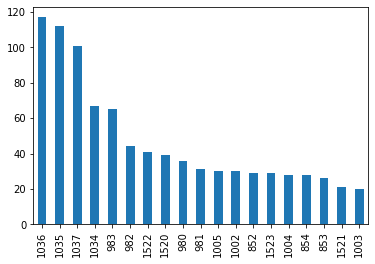

In [79]:
#Plotando o resultado da variável "criar_grafico" usando um gráfico de barras
criar_grafico.plot.bar()

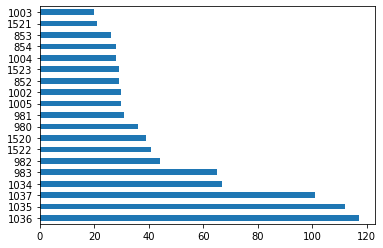

In [86]:
#Plotando o resultado da variável "criar_grafico" usando um gráfico de barras na horizontal 
  # O ";" no final do comando é para ocultar a mensagem <matplotlib.axes._subplots.AxesSubplot at 0x7f3e76c53e90>

criar_grafico.plot.barh();

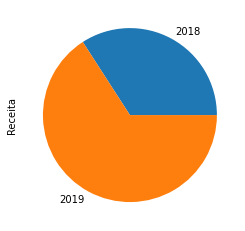

In [90]:
#Plotar um gráfico de pizza

df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie();

In [93]:
#Total de vendas por cidade

vendas_cidade = df['Cidade'].value_counts()

print(vendas_cidade)

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64


In [95]:
#Será importante importar a biblioteca matplotlib.pyplot para alterar informações gráficas, feito no primeiro módulo desse notebook

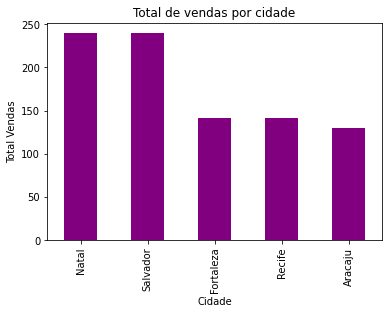

In [99]:
#Adicionando título e rótulos aos eixos do gráfico
vendas_cidade.plot.bar(title='Total de vendas por cidade', color = 'purple')
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

In [100]:
#Alterar estilo do gráfico
  #Consultar a documentação para identificar os estilos
plt.style.use("ggplot")

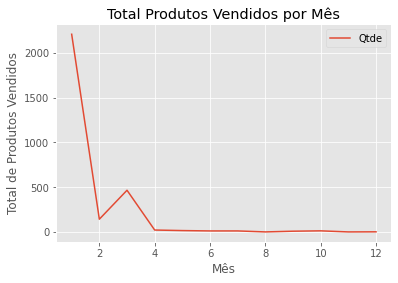

In [103]:
qtde_mes = df.groupby(df["Mês_Venda"])["Qtde"].sum()
qtde_mes.plot(title="Total Produtos Vendidos por Mês")
plt.xlabel("Mês")
plt.ylabel("Total de Produtos Vendidos")
plt.legend();

In [104]:
qtde_mes

Mês_Venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [106]:
#Criando um novo database apenas com os dados de 2019
df_2019 = df[df["Ano_Venda"] == 2019]

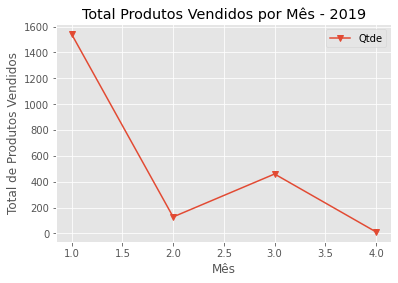

In [112]:
#Total de produtos vendidos por mês de 2019
qtde_mes_2019 = df_2019.groupby("Mês_Venda")["Qtde"].sum()

qtde_mes_2019.plot(title = "Total Produtos Vendidos por Mês - 2019",marker = 'v')
plt.xlabel("Mês")
plt.ylabel("Total de Produtos Vendidos")
plt.legend();


In [113]:
qtde_mes_2019

Mês_Venda
1    1541
2     128
3     460
4      12
Name: Qtde, dtype: int64

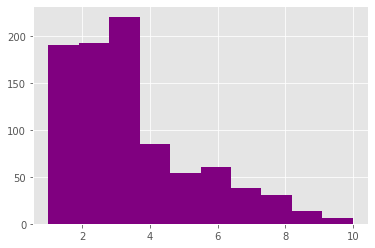

In [114]:
#Plotar um histograma

plt.hist(df['Qtde'], color = "purple");

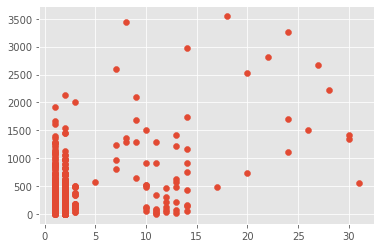

In [115]:
#Gráfico de dispersão
plt.scatter(x=df_2019["Dia_Venda"], y=df_2019["Receita"]);

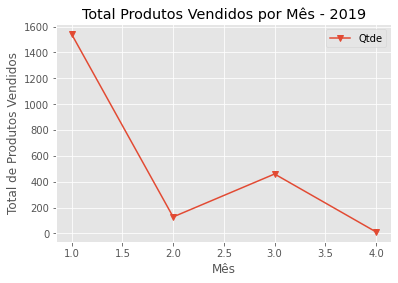

In [116]:
#Salvando em PNG - fica salvo em files
qtde_mes_2019 = df_2019.groupby("Mês_Venda")["Qtde"].sum()

qtde_mes_2019.plot(title = "Total Produtos Vendidos por Mês - 2019",marker = 'v')
plt.xlabel("Mês")
plt.ylabel("Total de Produtos Vendidos")
plt.legend();
plt.savefig("Gráfico_de_qtde_por_mês_2019.png")